In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
Beans = pd.read_excel('DryBeanDataSet.xlsx')
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [4]:
Beans.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
Constantness         int64
EquivDiameter      float64
Colour              object
Extent              object
Solidity           float64
roundness          float64
Compactness         object
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
ShapeFactor5       float64
ShapeFactor6        object
Class               object
Sort order         float64
dtype: object

In [5]:
Beans["Colour"] = Beans["Colour"].astype('category')
Beans["Constantness"] = Beans["Constantness"].astype('category')
Beans["Class"] = Beans["Class"].astype('category')
Beans["Extent"] = pd.to_numeric(Beans["Extent"], errors='coerce')
Beans["Compactness"] = pd.to_numeric(Beans["Compactness"], errors='coerce')
Beans["ShapeFactor6"] = pd.to_numeric(Beans["ShapeFactor6"], errors='coerce')

In [6]:
Beans.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
Constantness       category
EquivDiameter       float64
Colour             category
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
ShapeFactor5        float64
ShapeFactor6        float64
Class              category
Sort order          float64
dtype: object

In [7]:
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [8]:
Beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Sort order
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,1.361100e+04,13605.000000,13611.000000,13611.000000,13593.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13606.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53765.692602,4.762541e+02,0.749747,0.987143,0.873282,0.799886,0.006564,0.001716,0.643590,2.368097,0.995063,89.358603,0.500271
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29778.009358,2.583687e+04,0.049085,0.004660,0.059520,0.061684,0.001128,0.000596,0.098996,0.871619,0.004366,51.838555,0.287926
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,-30.000000,1.614174e-01,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.695579,0.947687,0.000466,0.000089
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,2.150680e+02,0.718641,0.985670,0.832096,0.762577,0.005900,0.001154,0.581359,1.614151,0.993703,45.258826,0.248187
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,2.384380e+02,0.759874,0.988283,0.883157,0.801291,0.006645,0.001694,0.642044,2.368757,0.996386,88.766670,0.503810
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,2.794522e+02,0.786852,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,3.115695,0.997883,134.273148,0.750096
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,3.014441e+06,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,3.966119,0.999733,178.985023,0.999985


In [9]:
((Beans.isna().sum())/13611) * 100

Area               0.000000
Perimeter          0.000000
MajorAxisLength    0.000000
MinorAxisLength    0.000000
AspectRation       0.000000
Eccentricity       0.000000
ConvexArea         0.000000
Constantness       0.000000
EquivDiameter      0.000000
Colour             0.000000
Extent             0.044082
Solidity           0.000000
roundness          0.000000
Compactness        0.132246
ShapeFactor1       0.000000
ShapeFactor2       0.000000
ShapeFactor3       0.000000
ShapeFactor4       0.000000
ShapeFactor5       0.000000
ShapeFactor6       0.036735
Class              0.000000
Sort order         0.000000
dtype: float64

In [10]:
(Beans == "?").sum()/13611 * 100

Area               0.000000
Perimeter          0.000000
MajorAxisLength    0.000000
MinorAxisLength    0.000000
AspectRation       0.000000
Eccentricity       0.000000
ConvexArea         0.000000
Constantness       0.000000
EquivDiameter      0.000000
Colour             0.044082
Extent             0.000000
Solidity           0.000000
roundness          0.000000
Compactness        0.000000
ShapeFactor1       0.000000
ShapeFactor2       0.000000
ShapeFactor3       0.000000
ShapeFactor4       0.000000
ShapeFactor5       0.000000
ShapeFactor6       0.000000
Class              0.124899
Sort order         0.000000
dtype: float64

In [11]:
Beans.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
Constantness           2
EquivDiameter      12012
Colour                 5
Extent             13529
Solidity           13526
roundness          13543
Compactness        13525
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13611
ShapeFactor5       13543
ShapeFactor6       13606
Class                  8
Sort order         13611
dtype: int64

In [12]:
print(Beans["Class"].value_counts())
print(Beans["Colour"].value_counts())
print(Beans["Constantness"].value_counts())

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
?             17
Name: Class, dtype: int64
brown    6115
black    3541
green    2023
white    1926
?           6
Name: Colour, dtype: int64
1    12289
0     1322
Name: Constantness, dtype: int64


In [13]:
Beans["Class"].replace('?', np.nan, inplace=True)
Beans["Colour"].replace('?', np.nan, inplace=True)

In [14]:
print(Beans["Class"].value_counts())
print(Beans["Colour"].value_counts())
print(Beans["Constantness"].value_counts())

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: Class, dtype: int64
brown    6115
black    3541
green    2023
white    1926
Name: Colour, dtype: int64
1    12289
0     1322
Name: Constantness, dtype: int64


### Save the missing value entries

In [15]:
missing_beans = Beans[Beans.isna().any(axis=1)]
missing_beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
6,44787,861.814,344.333903,166.179732,2.072057,0.875834,45406,1,238.798198,brown,...,0.757765,0.693508,0.007688,0.001097,0.480953,1.522022,0.996562,25.541389,NaN,0.678889
104,48479,836.757,312.354576,199.059288,1.569153,0.770627,49080,0,248.445930,brown,...,0.870091,NaN,0.006443,0.001591,0.632657,2.705577,0.992735,99.847826,SIRA,0.923518
118,42432,776.089,290.071712,187.172173,1.549759,0.763962,42908,1,232.435153,brown,...,0.885279,0.801302,0.006836,0.001739,0.642086,1.117294,0.995078,126.833659,NaN,0.770406
436,41708,775.920,292.968805,181.913240,1.610486,0.783866,42212,1,230.443648,brown,...,0.870553,0.786581,0.007024,0.001659,0.618709,2.961417,0.996423,111.802204,NaN,0.729772
484,76489,1079.856,423.766238,234.103967,1.810163,0.833555,78182,0,312.071818,brown,...,0.824285,NaN,0.005540,0.001005,0.542321,2.856135,0.981689,103.156493,CALI,0.942229
788,56433,948.827,381.693063,191.664022,1.991470,0.864785,57627,1,268.053590,white,...,0.787715,NaN,0.006764,0.001015,0.493191,2.034846,0.982174,72.216663,HOROZ,0.437256
902,33128,672.417,249.492034,169.302978,1.473642,0.734517,33481,1,205.377408,black,...,0.920720,NaN,0.007531,0.002133,0.677629,2.626517,0.998583,93.499108,DERMASON,0.037087
935,79500,1114.478,384.103818,264.490171,1.452242,0.725151,80894,1,318.154905,brown,...,0.804329,0.828304,0.004831,0.001403,0.686088,0.950476,0.996366,55.089332,NaN,0.889605
1164,94651,1199.819,424.741867,284.927628,1.490701,0.741615,95964,0,347.150394,brown,...,0.826235,0.817321,0.004487,0.001235,0.668013,0.954858,0.995808,48.194068,NaN,0.915006
1175,34757,686.779,231.229870,191.672033,1.206383,0.559361,35150,1,210.366316,NaN,...,0.926015,0.909771,0.006653,0.002811,0.827684,3.761237,0.998504,66.211289,SEKER,0.849043


### Drop the missing values from the data set and perform outlier detection as well as dropsort order as it has unique values

In [16]:
Beans["Constantness"] = pd.to_numeric(Beans["Constantness"], errors='coerce')
Big_beans = Beans.dropna()
Big_beans = Big_beans.drop(['Sort order'], axis=1)
Big_beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.975443,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.989977,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.990191,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.987365,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.991657,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,black,...,0.980950,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969,DERMASON
13607,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,brown,...,0.981958,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591,BARBUNYA
13608,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,brown,...,0.977668,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378,BARBUNYA
13609,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,white,...,0.987957,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039,HOROZ


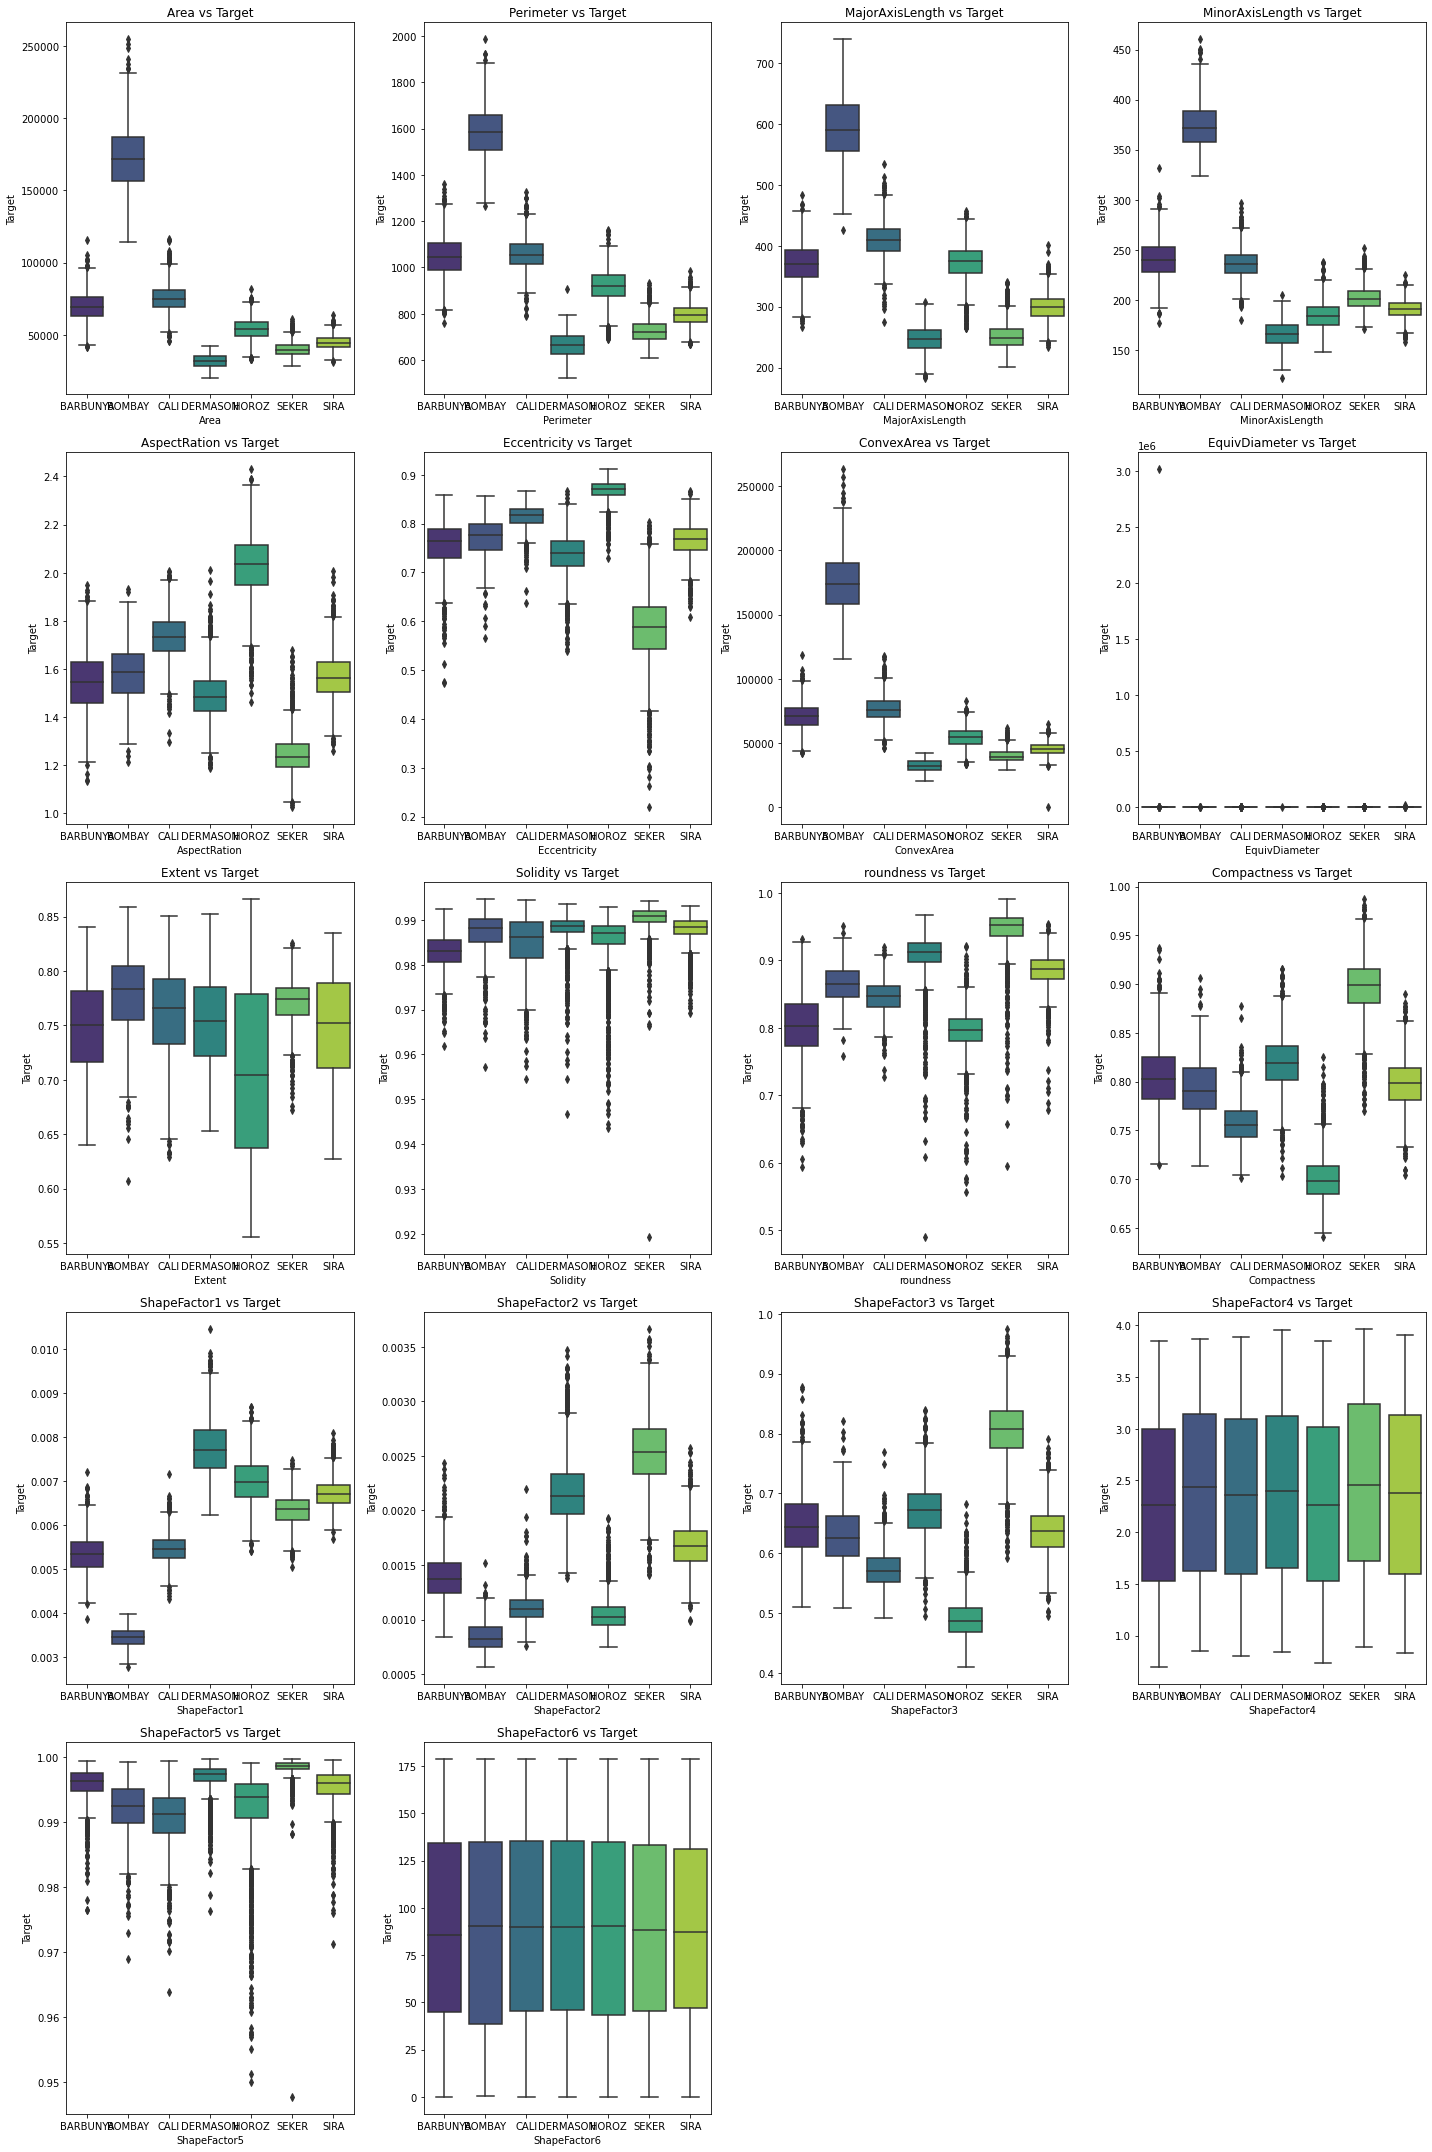

In [17]:
features = Big_beans.drop(["Class", "Constantness", "Colour"], axis=1)
# Number of features
num_features = len(features)

# Set up the subplot grid
fig, axes = plt.subplots(5, 4, figsize=(20, 30))
axes = axes.flatten()
# Create scatter plots
for i, feature in enumerate(features):
    sns.boxplot(data=Big_beans, x='Class', y=feature, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

for i in range(len(axes)-2, len(axes)):
    fig.delaxes(axes[i])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Plots/Continuous boxplots")
plt.show()

### We can immdetiatly see that EquivDiameter has a huge outlier and that Convex area also has an outlier that doesn't seem correct.

In [18]:
Big_beans.min()

C:\Users\andre\AppData\Local\Temp\ipykernel_18240\1548845714.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Big_beans.min()


Area               20420.000000
Perimeter            524.736000
MajorAxisLength      183.601165
MinorAxisLength      122.512653
AspectRation           1.024868
Eccentricity           0.218951
ConvexArea           -30.000000
Constantness           0.000000
EquivDiameter          0.161417
Extent                 0.555315
Solidity               0.919246
roundness              0.489618
Compactness            0.640577
ShapeFactor1           0.002778
ShapeFactor2           0.000564
ShapeFactor3           0.410339
ShapeFactor4           0.695579
ShapeFactor5           0.947687
ShapeFactor6           0.000466
dtype: float64

In [19]:
Big_beans.idxmin()

Area                3780
Perimeter          12095
MajorAxisLength     3780
MinorAxisLength     6715
AspectRation        3228
Eccentricity        3228
ConvexArea          3941
Constantness           7
EquivDiameter       5884
Colour                 1
Extent              5514
Solidity            4623
roundness           1672
Compactness         5372
ShapeFactor1        5568
ShapeFactor2        8476
ShapeFactor3        5372
ShapeFactor4       11487
ShapeFactor5        4623
ShapeFactor6        7120
Class                 28
dtype: int64

In [20]:
Big_beans.max()

C:\Users\andre\AppData\Local\Temp\ipykernel_18240\282406204.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Big_beans.max()


Area               2.546160e+05
Perimeter          1.985370e+03
MajorAxisLength    7.388602e+02
MinorAxisLength    4.601985e+02
AspectRation       2.430306e+00
Eccentricity       9.114230e-01
ConvexArea         2.632610e+05
Constantness       1.000000e+00
EquivDiameter      3.014441e+06
Extent             8.661946e-01
Solidity           9.946775e-01
roundness          9.906854e-01
Compactness        9.873030e-01
ShapeFactor1       1.045117e-02
ShapeFactor2       3.664972e-03
ShapeFactor3       9.747672e-01
ShapeFactor4       3.966119e+00
ShapeFactor5       9.997325e-01
ShapeFactor6       1.789850e+02
dtype: float64

In [21]:
Big_beans.idxmax()

Area                2070
Perimeter           2070
MajorAxisLength     2070
MinorAxisLength     5568
AspectRation        5372
Eccentricity        5372
ConvexArea          2070
Constantness           0
EquivDiameter       4780
Colour                12
Extent             10235
Solidity            3683
roundness          12500
Compactness         3228
ShapeFactor1        6715
ShapeFactor2       10807
ShapeFactor3        3228
ShapeFactor4        8119
ShapeFactor5       12618
ShapeFactor6         108
Class                  4
dtype: int64

### Looking at the boxplots, we can remove these outliers as they have been entered incorrectly into the data sheet.

The following incorrect outliers were detected:
* EquivDiameter entry number 2762
* Convex area entry number 3941
* EquivDiameter entry number 4780
* EquivDiameter entry number 5884

We will now remove the outliers for the rest of the Data exploration and when building our models to the data.

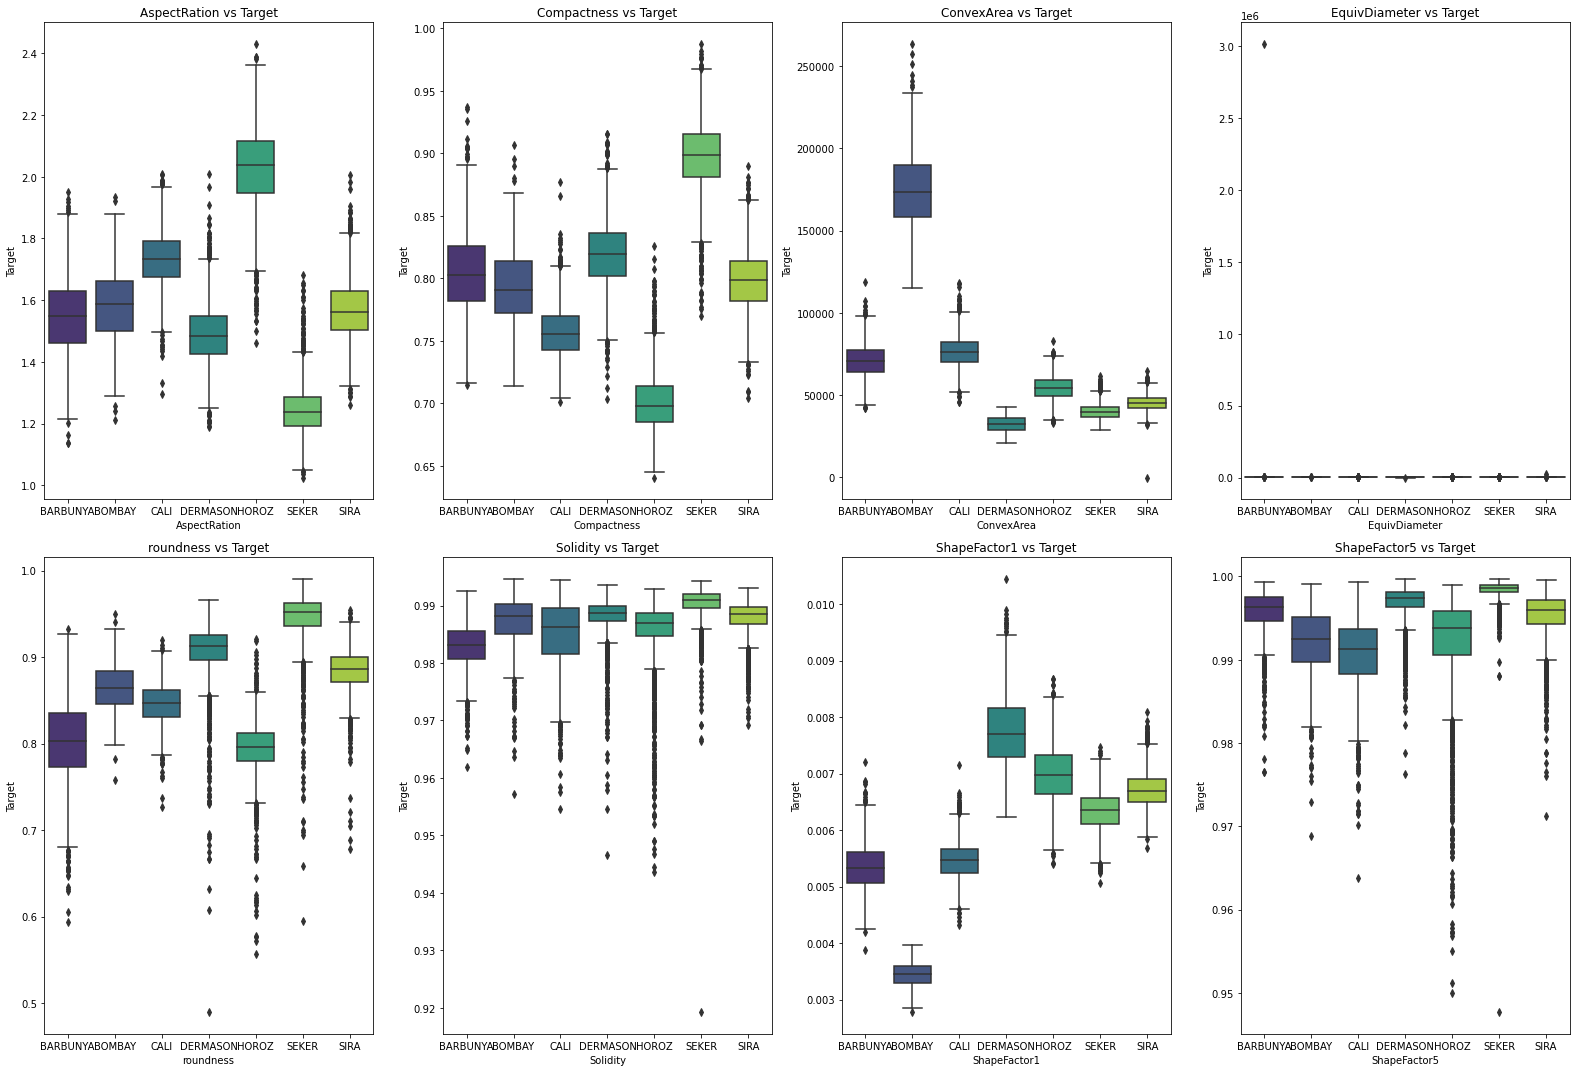

In [22]:
features = Big_beans[["AspectRation", "Compactness", "ConvexArea", "EquivDiameter", "roundness", "Solidity", "ShapeFactor1", "ShapeFactor5"]]
# Number of features
num_features = len(features)

# Set up the subplot grid
fig, axes = plt.subplots(2, 4, figsize=(22, 15))
axes = axes.flatten()
# Create scatter plots
for i, feature in enumerate(features):
    sns.boxplot(data=Big_beans, x='Class', y=feature, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

# for i in range(len(axes)-2, len(axes)):
#     fig.delaxes(axes[i])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Plots/Continuous boxplots")
plt.show()

In [23]:
Big_beans = Big_beans.drop([2762, 3941, 4780, 5884])
Big_beans = Big_beans.reset_index(drop=True)

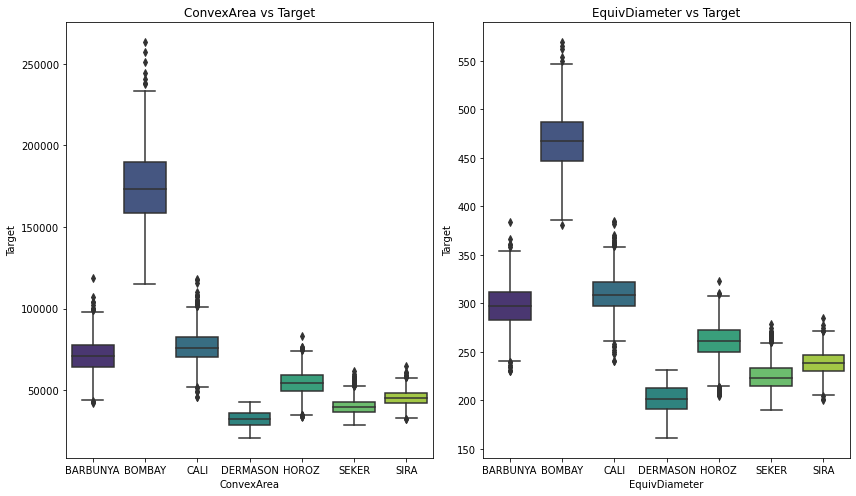

In [24]:
features = Big_beans[["ConvexArea", "EquivDiameter"]]
# Number of features
num_features = len(features)

# Set up the subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
axes = axes.flatten()
# Create scatter plots
for i, feature in enumerate(features):
    sns.boxplot(data=Big_beans, x='Class', y=feature, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

# for i in range(len(axes)-2, len(axes)):
#     fig.delaxes(axes[i])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Plots/Continuous boxplots")
plt.show()

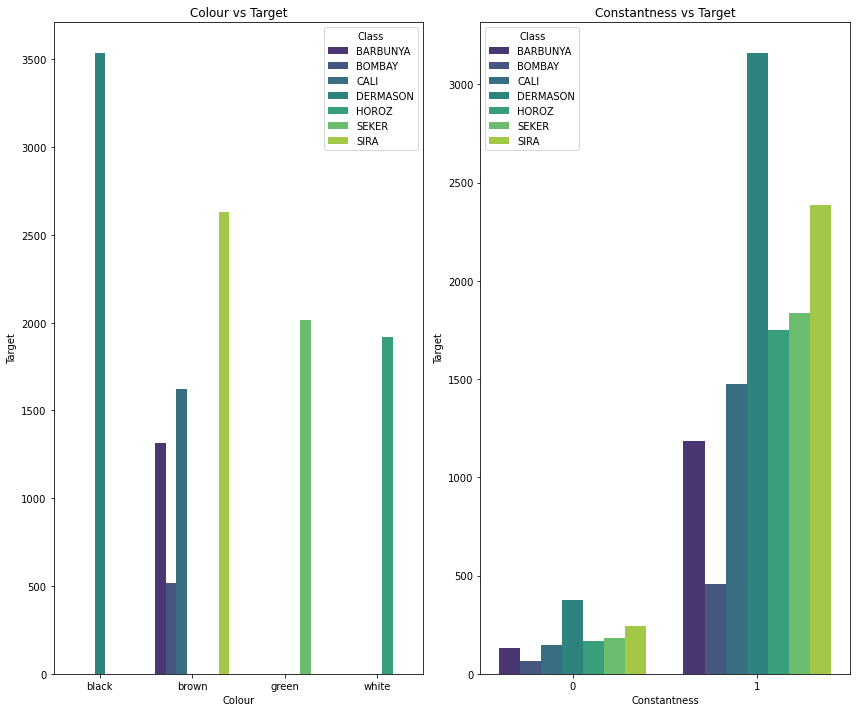

In [25]:
features = Big_beans[["Colour", "Constantness"]]
# Number of features
num_features = len(features)

# Set up the subplot grid
fig, axes = plt.subplots(1,2 , figsize=(12, 10))
axes = axes.flatten()
# Create scatter plots
for i, feature in enumerate(features):
    sns.countplot(data=Big_beans, x=feature, hue='Class', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Plots/Discrete boxplots")
# plt.show()

### Continue outlier detection for correctly entered outliers

In [26]:
Beans_encoded = pd.get_dummies(Big_beans.dropna(), columns=['Colour'], dtype=float)
Beans_encoded = Beans_encoded.reset_index(drop=True)
Beans_encoded

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Extent,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Colour_black,Colour_brown,Colour_green,Colour_white
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,0.767184,...,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.0,1.0,0.0,0.0
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,0.757739,...,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,1.0,0.0,0.0,0.0
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,0.790885,...,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.0,0.0,1.0,0.0
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,0.761092,...,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.0,1.0,0.0,0.0
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,0.721543,...,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13550,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,0.781994,...,0.002721,0.705888,2.197446,0.996776,85.821969,DERMASON,1.0,0.0,0.0,0.0
13551,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,0.762446,...,0.001203,0.592809,1.004792,0.992787,152.980591,BARBUNYA,0.0,1.0,0.0,0.0
13552,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,0.765377,...,0.001324,0.586644,2.219590,0.998113,102.437378,BARBUNYA,0.0,1.0,0.0,0.0
13553,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,0.773990,...,0.000937,0.488190,2.078504,0.990736,174.754039,HOROZ,0.0,0.0,0.0,1.0


In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=117)
y_pred = lof.fit_predict(Beans_encoded.drop(["Class"], axis=1))
outliers = Beans_encoded[y_pred == -1]
outliers

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Extent,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Colour_black,Colour_brown,Colour_green,Colour_white
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,0.761092,...,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.0,1.0,0.0,0.0
92,100635,1229.591,472.423793,276.096302,1.711083,0.811448,103329,1,357.955949,0.777945,...,0.000954,0.574111,0.847627,0.982351,164.674894,CALI,0.0,1.0,0.0,0.0
199,21602,558.343,208.523230,132.187521,1.577480,0.773397,21932,1,165.844869,0.745282,...,0.002382,0.632550,2.160858,0.997836,129.269003,DERMASON,1.0,0.0,0.0,0.0
305,126503,1326.959,475.772459,339.381887,1.401879,0.700830,128220,1,401.333555,0.771313,...,0.001175,0.711561,3.282466,0.997523,10.740922,BOMBAY,0.0,1.0,0.0,0.0
351,222737,1847.940,722.494068,396.696971,1.821274,0.835779,225516,0,532.538784,0.836552,...,0.000591,0.543293,3.379354,0.989485,60.352204,BOMBAY,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,21348,530.825,191.994494,141.859537,1.353413,0.673845,21590,1,164.866970,0.725974,...,0.003016,0.737377,3.325536,0.997976,98.239377,DERMASON,1.0,0.0,0.0,0.0
12910,233751,1849.371,706.993076,423.527988,1.669295,0.800708,237344,1,545.546530,0.819205,...,0.000661,0.595434,3.306143,0.993954,116.398367,BOMBAY,0.0,1.0,0.0,0.0
13335,47959,949.132,328.450539,190.117661,1.727617,0.815447,50202,1,247.109885,0.641575,...,0.001354,0.566031,2.034155,0.977885,26.283287,HOROZ,0.0,0.0,0.0,1.0
13380,40690,760.969,290.702356,180.494583,1.610588,0.783897,41649,1,227.613965,0.672395,...,0.001656,0.613057,2.132699,0.987382,58.208224,DERMASON,1.0,0.0,0.0,0.0


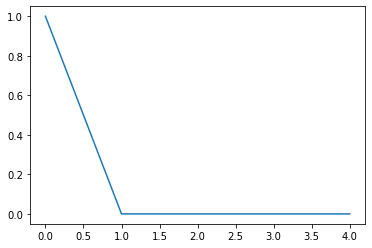

array([9.99965635e-01, 3.06441912e-05, 1.92261849e-06, 1.54157074e-06,
       2.29742519e-07])

In [34]:
from sklearn.decomposition import PCA
Beans_encoded_new = Beans_encoded.copy()
label = LabelEncoder()
Beans_encoded_new["Class"] = label.fit_transform(Beans_encoded_new["Class"])
pca = PCA(n_components=5)
pca.fit_transform(Beans_encoded_new)

explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance)
plt.show()
pca.explained_variance_ratio_

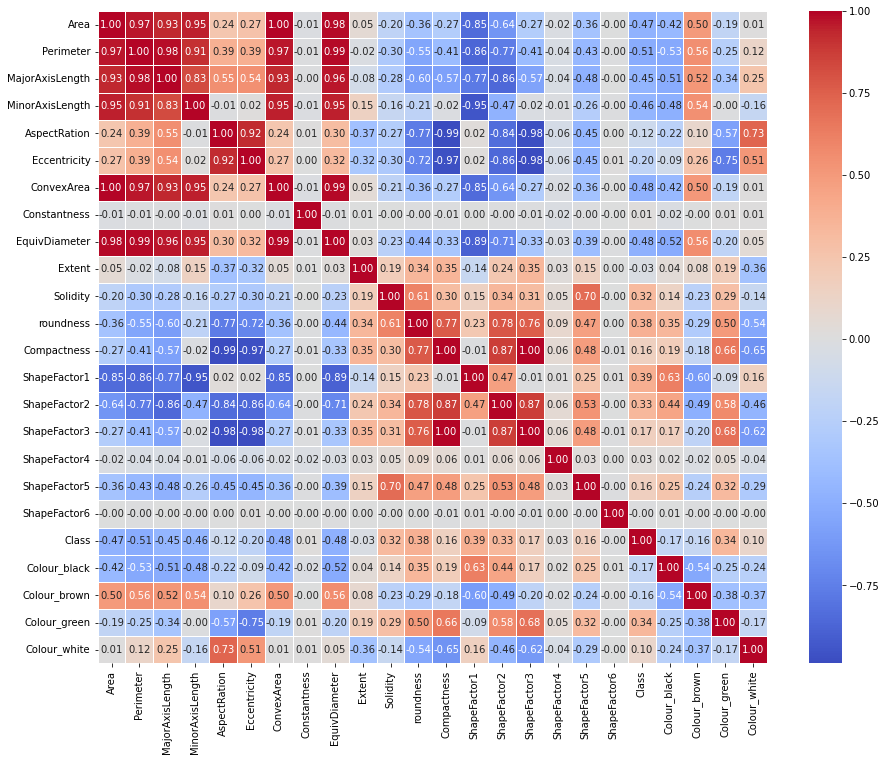

In [37]:
correlation_matrix = Beans_encoded_new.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()